<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto25/blob/main/Perceptron_Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Para arvore de decisão
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import pydotplus
import torch

# **Importar dataset**

In [ ]:
!pip3 install wget
!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/cardio.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-06-12 18:41:04--  https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/cardio.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [text/plain]
Saving to: ‘cardio.csv.1’

cardio.csv.1        100%[===================>]   2.80M  --.-KB/s    in 0.07s   

2022-06-12 18:41:05 (42.3 MB/s) - ‘cardio.csv.1’ saved [2941524/2941524]



# **Tratamento da base de dados**

In [ ]:
df = pd.read_csv('/content/cardio.csv', sep = ';')
df = df.iloc[:, 1:]

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

print(len(X))

70000


# **Dividir dataset de treino e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# **Perceptron**

In [ ]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train.values.ravel())

Perceptron(eta0=0.1)

# **Testar modelo**

In [ ]:
y_pred = ppn.predict(X_test)

# **Avaliação do modelo**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.5037857142857143

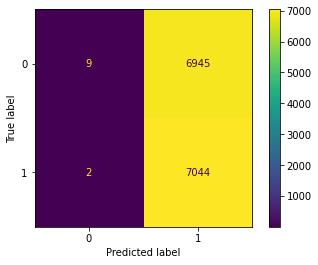

In [ ]:
confusion_matrix(y_test, y_pred)

plot_confusion_matrix(ppn, X_test, y_test) 

accuracy_score(y_test, y_pred)

# **Multicamadas perceptron**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random as python_random

SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)
ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#mencionar que o adam é um stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

history = ann.fit(X_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
438/438 [==============================] - 3s 3ms/step - loss: 49.8859 - accuracy: 0.4972
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7886 - accuracy: 0.5060
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7870 - accuracy: 0.5008
Epoch 4/100
438/438 [==============================] - 2s 4ms/step - loss: 0.7702 - accuracy: 0.5025
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7663 - accuracy: 0.5065
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7643 - accuracy: 0.5000
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7484 - accuracy: 0.5106
Epoch 8/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7400 - accuracy: 0.5096
Epoch 9/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7361 - accuracy: 0.5090
Epoch 10/100
438/438 [==============================] - 1s 3ms/step - loss: 0.7197 - accur

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))

accuracy_score(y_test, y_pred)


[[6182  772]
 [3731 3315]]


0.6783571428571429